In [1]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers

Using TensorFlow backend.


In [2]:
# Loads the training and test data sets (ignoring class labels)
(x_train, _), (x_test, _) = mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value


In [3]:
print('x_train.shape                             :{}'.format(x_train.shape))
print('x_train.shape[1:]                         :{}'.format(x_train.shape[1:]))
print('np.prod(x_train.shape[1:])                :{}'.format(np.prod(x_train.shape[1:])))
print('x_train.reshape(len(x_train), 28*28).shape:{}'.format(x_train.reshape(len(x_train), np.prod(x_train.shape[1:])).shape))
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
print('*'*100);print('x_train.shape:{}  x_test.shape:{}'.format(x_train.shape, x_test.shape))

x_train.shape                             :(60000, 28, 28)
x_train.shape[1:]                         :(28, 28)
np.prod(x_train.shape[1:])                :784
x_train.reshape(len(x_train), 28*28).shape:(60000, 784)
****************************************************************************************************
x_train.shape:(60000, 784)  x_test.shape:(10000, 784)


In [9]:
# input dimension = 784
input_dim = x_train.shape[1]
encoding_dim = 32
# compression rate
compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

Compression factor: 24.5


In [8]:
# model configure
autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))
print('Initial Shape : {}'.format(x_train.shape))
autoencoder.summary()

Initial Shape : (60000, 784)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [24]:
# AutoEncoder의 중간 레이어 처리
input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Optimizer / Loss Define
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.2775 - val_loss: 0.1886
Epoch 2/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1691 - val_loss: 0.1526
Epoch 3/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1433 - val_loss: 0.1329
Epoch 4/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1276 - val_loss: 0.1204
Epoch 5/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.1175 - val_loss: 0.1122
Epoch 6/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1106 - val_loss: 0.1064
Epoch 7/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1056 - val_loss: 0.1023
Epoch 8/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1020 - val_loss: 0.0991
Epoch 9/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.0993 - val_loss: 0.0968
Epoch

In [51]:
# 임의의 인덱스 10개 잡아내기
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)


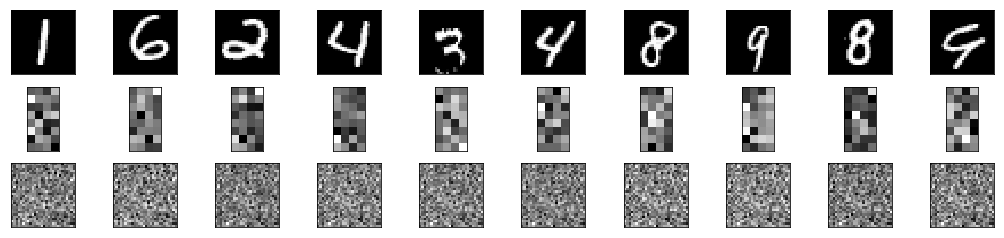

In [52]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

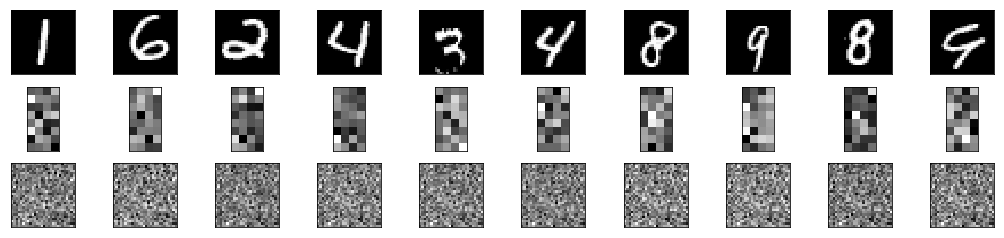

In [49]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 좀더 깊은 AutoEncoder를 구축해보자. 

In [59]:
# model configure
autoencoder = Sequential()
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(1 * encoding_dim, activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))
print('Initial Shape : {}'.format(x_train.shape))
autoencoder.summary()

# AutoEncoder의 중간 레이어 처리
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder_layer4 = autoencoder.layers[3]
encoder_layer5 = autoencoder.layers[4]
encoder1 = Model(input_img, encoder_layer1(input_img))
encoder2 = Model(input_img, encoder_layer2(encoder_layer1(input_img)))
encoder3 = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))
encoder4 = Model(input_img, encoder_layer4(encoder_layer3(encoder_layer2(encoder_layer1(input_img)))))
encoder5 = Model(input_img, encoder_layer5(encoder_layer4(encoder_layer3(encoder_layer2(encoder_layer1(input_img))))))
encoder1.summary()
encoder2.summary()
encoder3.summary()
encoder4.summary()
encoder5.summary()

Initial Shape : (60000, 784)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_74 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_75 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_76 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_77 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_78 (Dense)             (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
_________________________________________

In [60]:
# Optimizer / Loss Define
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.2472 - val_loss: 0.1746
Epoch 2/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.1570 - val_loss: 0.1403
Epoch 3/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1337 - val_loss: 0.1251
Epoch 4/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1221 - val_loss: 0.1179
Epoch 5/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.1161 - val_loss: 0.1125
Epoch 6/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1120 - val_loss: 0.1087
Epoch 7/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1084 - val_loss: 0.1058
Epoch 8/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1057 - val_loss: 0.1035
Epoch 9/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1036 - val_loss: 0.1014
Epoc

In [61]:
# 임의의 인덱스 10개 잡아내기
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs1 = encoder1.predict(x_test)
encoded_imgs2 = encoder2.predict(x_test)
encoded_imgs3 = encoder3.predict(x_test)
encoded_imgs4 = encoder4.predict(x_test)
encoded_imgs5 = encoder5.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)


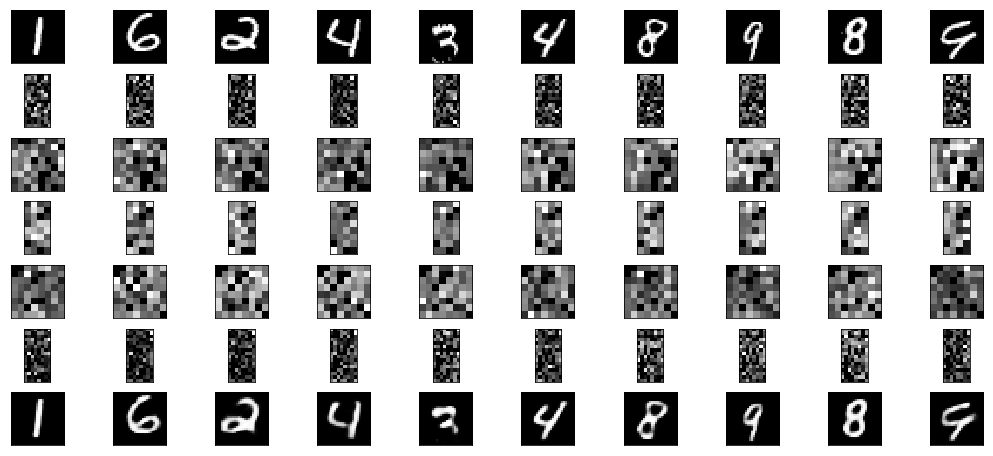

In [76]:
plt.figure(figsize=(18, 8))
for i, image_idx in enumerate(random_test_images):

    # plot original image
    ax = plt.subplot(7, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(7, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs1[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot encoded image
    ax = plt.subplot(7, num_images, 2*num_images + i + 1)
    plt.imshow(encoded_imgs2[image_idx].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot encoded image
    ax = plt.subplot(7, num_images, 3*num_images + i + 1)
    plt.imshow(encoded_imgs3[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot encoded image
    ax = plt.subplot(7, num_images, 4*num_images + i + 1)
    plt.imshow(encoded_imgs4[image_idx].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot encoded image
    ax = plt.subplot(7, num_images, 5*num_images + i + 1)
    plt.imshow(encoded_imgs5[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(7, num_images, 6*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()